In [82]:
from sklearn.datasets import make_gaussian_quantiles #Generate isotropic Gaussian and label samples by quantile
import matplotlib.pyplot as plt

samples = 2
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

#print(Y)
# Visualize the data
#plt.scatter(X[0, :], X[1, :]) #, c=Y, s=40);
#plt.show()

In [83]:
X

array([[-0.09596096,  0.46202099],
       [ 0.83900681,  1.45995693]])

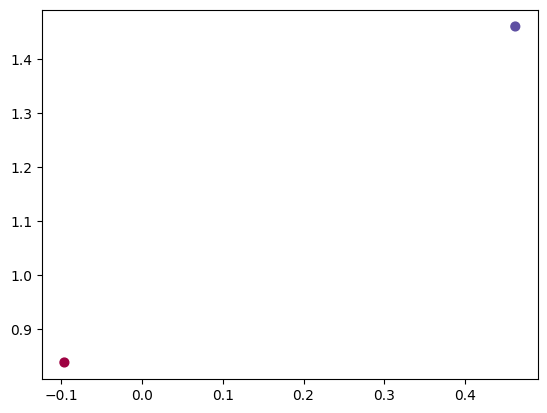

In [84]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

c:\Users\yomaa\Documents\Environments\everything\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


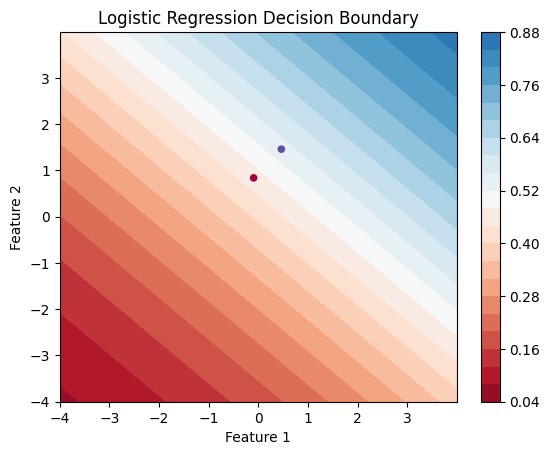

Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


In [85]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np


xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
clf=LogisticRegression()

clf.fit(X.T, Y.T)

probs = clf.predict_proba(grid)[:, 1]
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

'''
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[200:,0], X[200:, 1], c=Y[200:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
'''
#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
#plt.title("Logistic Regression")
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [86]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

print(n_x, n_y)

2 1


In [87]:
W1 = np.random.randn(n_h,n_x) * 0.01 #4x2
b1 = np.zeros(shape=(n_h, 1)) #4x1
W2 = np.random.randn(n_y,n_h) * 0.01 #1x4
b2 = np.zeros(shape=(n_y, 1))#1x1

print("W1\n", W1)
print("b1\n", b1)
print("W2\n", W2)
print("b2\n", b2)

W1
 [[ 0.00853082 -0.00352809]
 [ 0.00163995 -0.01758943]
 [ 0.02574024 -0.0008008 ]
 [-0.00423043 -0.01321949]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[-0.00370289 -0.00358971  0.00407026 -0.00971188]]
b2
 [[0.]]


In [88]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

In [89]:
# Implement Forward Propagation to calculate A2 (probabilities)
Z1 = np.dot(W1,X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2) # Final output prediction

print(b2)

[[0.]]


In [90]:
# Compute the cross-entropy cost
samples=2
old_total_cost = total_cost
cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
total_cost = -np.sum(cost_function) / samples

print("cost=", total_cost)
print("cost delta=", np.subtract(total_cost, old_total_cost))

cost= 0.693100827677813
cost delta= 9999.693100827677


In [91]:
print(Z1.shape)
print(A1.shape)
print(Z2.shape)
print(A2.shape)
print(cost_function.shape)

(4, 2)
(4, 2)
(1, 2)
(1, 2)
(1, 2)


In [92]:
dJdZ2 = A2 - Y
dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
# since activation function is tanh(Z1) = A1
# first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

print("dJdZ2=", dJdZ2)
print("dJdW2=", dJdW2)
print("dJdb2=", dJdb2)
print("dJdW1=", dJdW1)
print("dJdb1=", dJdb1)

dJdZ2= [[ 0.50003963 -0.49991401]]
dJdW2= [[-0.00064244  0.00249939 -0.00346583  0.00264046]]
dJdb2= [[6.28085967e-05]]
dJdW1= [[ 0.00051647  0.00057454]
 [ 0.00050041  0.00055633]
 [-0.00056765 -0.00063137]
 [ 0.00135406  0.00150551]]
dJdb1= [[-2.20708157e-07]
 [-5.82915858e-07]
 [ 3.62583439e-07]
 [-1.42909388e-06]]


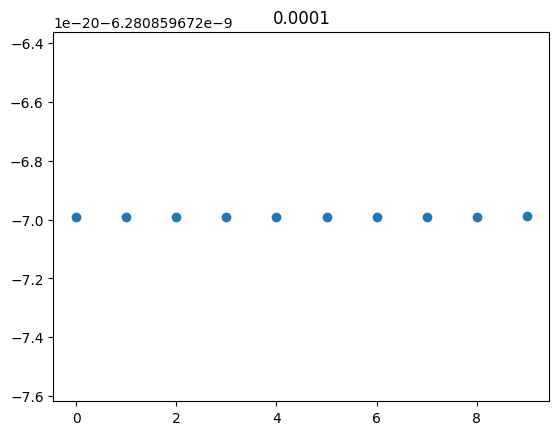

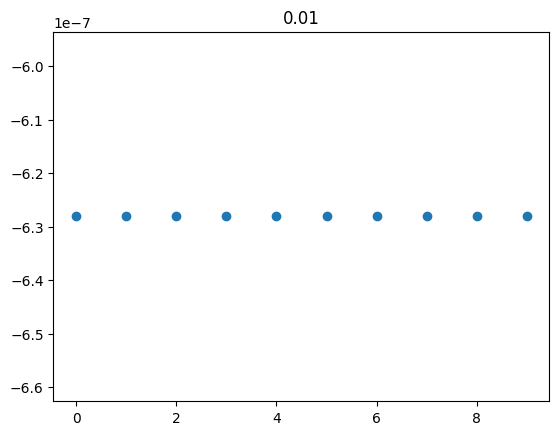

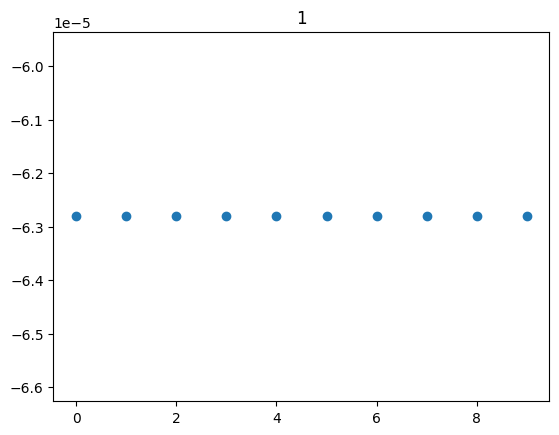

In [93]:

b2_init = b2
learning_rate = [0.0001,0.01,1]
for i in learning_rate:
    b2 = b2_init
    deltas = []
    for j in range(10):
        b2_old = b2
        W1 = W1 - i * dJdW1
        b1 = b1 - i * dJdb1
        W2 = W2 - i * dJdW2
        b2 = b2 - i * dJdb2
        deltas.append(np.subtract(b2, b2_old))
    plt.scatter(y=deltas,x=range(10))
    plt.title(str(i))
    plt.show()

We can see that the effect of the learning rate on the delta change is a constant change.

## Optional Extra Programming

In [22]:
# creating the input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
print ('\n Input:')
print(X)

# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# initializing the variables
epoch=15000 # number of training iterations
lr=0.1 # learning rate
inputlayer_neurons = X.shape[1] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight and bias
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

# training the model
for i in range(epoch):

    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

print ('\n Output from the model:')
print (output)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Actual Output:
[[1]
 [1]
 [0]]

 Output from the model:
[[0.98889886]
 [0.98346703]
 [0.0243407 ]]


In [23]:
# creating the input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])
print ('\n Input:')
print(X)

# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Actual Output:
[[1]
 [1]
 [0]]


In [24]:
# initializing the variables
epoch=15000 # number of training iterations
lr=0.1 # learning rate
inputlayer_neurons = X.shape[1] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

In [25]:
inputlayer_neurons

4

In [26]:
# initializing weight and bias
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wh

array([[0.03561878, 0.84857345, 0.75697795],
       [0.75587554, 0.08083568, 0.5812332 ],
       [0.0307644 , 0.09689823, 0.65629119],
       [0.31236563, 0.86094736, 0.1072496 ]])

In [27]:
bh

array([[0.39344982, 0.88686421, 0.64478032]])

In [28]:
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [29]:
wout

array([[0.96636469],
       [0.87653986],
       [0.20875646]])

In [30]:
bout

array([[0.46309714]])

In [31]:
# training the model
epoch=2
for i in range(epoch):

    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh   #h1
    hiddenlayer_activations = sigmoid(hidden_layer_input) #sigmoid(h1)=a1
    output_layer_input1=np.dot(hiddenlayer_activations,wout)#w2*a1
    output_layer_input= output_layer_input1+ bout#w2.a1+b2=h2
    output = sigmoid(output_layer_input) #sigmoid(h2)=a2

    #Backpropagation
    E = y-output  #y-a2
    print(output)
    slope_output_layer = derivatives_sigmoid(output) #d a2/ d h2 = a2*1-a2
    print(slope_output_layer)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations) #d a1/d h1 =a1.(1-a1)
    print (slope_hidden_layer)
    d_output = E * slope_output_layer#compute change factor(delta) at the output layer, dependent on the gradient of error multiplied by the slope of output layer activation
    Error_at_hidden_layer = d_output.dot(wout.T)#error will propogate back into hidden layer E * d a2 * W2.T
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer #d a1 * (E* d a2 * W2.T) 
    wout += hiddenlayer_activations.T.dot(d_output) *lr #w2+a1.(E*d a2/ d h2).lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

print ('\n Output from the model:')
print (output)

[[0.88039572]
 [0.89400819]
 [0.89734037]]
[[0.10529909]
 [0.09475755]
 [0.09212063]]
[[0.23723675 0.11892721 0.1004179 ]
 [0.21614536 0.059355   0.0923197 ]
 [0.15278627 0.11924508 0.16509777]]
[[0.87853011]
 [0.89222841]
 [0.89558221]]
[[0.10671495]
 [0.09615687]
 [0.09351472]]
[[0.237222   0.1189542  0.10042937]
 [0.21620386 0.05941334 0.09235   ]
 [0.15306769 0.11944838 0.16517373]]

 Output from the model:
[[0.87853011]
 [0.89222841]
 [0.89558221]]
